## Project - Best model for fat level classification of Canadian cheese ## 

### Introduction ###

The Canadian Cheese dataset listed Canadian cheeses made from the milk of cow, goat, sheep and buffalo. There are 1042 uniquely identified cheeses or observations(examples) in the dataset. All the cheeses are being produced according to the guidelines including the types of milk, the cheese category, the milk treatment, the fat content, the moisture content, the ripening period, and production method which represent the features of the dataset. 

In this dataset I would like to pay attention more into fat content of milk. Coronary heart disease is the  leading cause of death in the whole world. Among the risk factors, high intake of total fat and saturated fat are the main contributors. Milk to some extent is associated with increased total LDL cholesterol with 65% - 70% of the milk fat comprise with saturated fatty acids. Therefore, I would like to design a model to predict the fat content of the cheeses as lower or higher.

In this dataset, target feature is "FatLevel" which comprises of two classes as higher fat and lower fat. Therefore, the problem is classification of predicting among two classes. The __positive class__ would be "__higher fat__" as it is so much affect for the human health.   

There are 13 features in the dataset. Mostly concentrated, the features related to processing such as manufacturing type, Moisture Percent, organic, Category type, Milk type, milk treatment type, Fat level. Post processing features such as flavours and characteristics will not be considered. Also, the features cheese id and cheese name will not be considered as they are very unique and independent from the product characteristics. Cheeses rind means outer covering of the cheese and constitute of micro flora. The advantage of having a rind is to protect cheeses from the pathogens and its mainly contributed to determine the flavour of the cheese; therefore, the rind type will not be considered for the analysis. 



In [49]:
import pandas as pd
import altair as alt
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_validate
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import (
    FunctionTransformer,
    Normalizer,
    OneHotEncoder,
    StandardScaler,
    normalize,
    scale)
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

#### Importing data ####

In [50]:
data = pd.read_csv('../final_project/data/cheese_data.csv')
data

,CheeseId,ManufacturerProvCode,ManufacturingTypeEn,MoisturePercent,FlavourEn,CharacteristicsEn,Organic,CategoryTypeEn,MilkTypeEn,MilkTreatmentTypeEn,RindTypeEn,CheeseName,FatLevel
0,228,NB,Farmstead,47.0,"Sharp, lactic",Uncooked,0,Firm Cheese,Ewe,Raw Milk,Washed Rind,Sieur de Duplessis (Le),lower fat
1,242,NB,Farmstead,47.9,"Sharp, lactic, lightly caramelized",Uncooked,0,Semi-soft Cheese,Cow,Raw Milk,Washed Rind,Tomme Le Champ Doré,lower fat
2,301,ON,Industrial,54.0,"Mild, tangy, and fruity","Pressed and cooked cheese, pasta filata, inter...",0,Firm Cheese,Cow,Pasteurized,NaN,Provolone Sette Fette (Tre-Stelle),lower fat
3,303,NB,Farmstead,47.0,Sharp with fruity notes and a hint of wild honey,NaN,0,Veined Cheeses,Cow,Raw Milk,NaN,Geai Bleu (Le),lower fat
4,319,NB,Farmstead,49.4,Softer taste,NaN,1,Semi-soft Cheese,Cow,Raw Milk,Washed Rind,Gamin (Le),lower fat
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,2387,NS,Farmstead,37.0,"Dill, Caraway, Chili Pepper, Cumin, Sage, Chiv...",Fresh curds through a variety of added Organic...,1,Hard Cheese,Cow,Pasteurized,NaN,Knoydart,higher fat
1038,2388,AB,Industrial,46.0,Mild and Deep Flavor,Low in Sodium and Fat,0,Fresh Cheese,Cow,Pasteurized,NaN,FRESK-O,lower fat
1039,2389,NS,Artisan,40.0,Grassy tang and restrained saltiness that refl...,NaN,0,Veined Cheeses,Ewe,Thermised,NaN,Electric Blue,higher fat
1040,2390,NS,Artisan,34.0,Sweet and tangy flavours combine with hoppy no...,NaN,0,Semi-soft Cheese,Ewe,Thermised,Washed Rind,Hip Hop,higher fat


Data is being split into train and test split in the ratio 80 to 20

In [51]:
train_df, test_df = train_test_split(data, test_size=0.2, random_state=123)
train_df, test_df


(      CheeseId ManufacturerProvCode ManufacturingTypeEn  MoisturePercent  \
 482       1506                   QC             Artisan             48.0   
 896       2055                   QC             Artisan             45.0   
 421       1445                   QC          Industrial             50.0   
 929       2141                   BC             Artisan             40.0   
 737       1810                   QC             Artisan             65.0   
 ...        ...                  ...                 ...              ...   
 638       1677                   QC             Artisan             44.0   
 113        951                   ON          Industrial             52.0   
 96         916                   ON          Industrial             74.0   
 106        936                   ON          Industrial             40.0   
 1041      2391                   AB             Artisan             31.5   
 
                                               FlavourEn  \
 482          

#### Investigation of datatypes ####

In [53]:
train_df.describe(include='all')

,CheeseId,ManufacturerProvCode,ManufacturingTypeEn,MoisturePercent,FlavourEn,CharacteristicsEn,Organic,CategoryTypeEn,MilkTypeEn,MilkTreatmentTypeEn,RindTypeEn,CheeseName,FatLevel
count,833.000000,833,833,821.000000,637,522,833.000000,813,832,781,579,833,833
unique,NaN,10,3,NaN,515,446,NaN,6,8,3,4,830,2
top,NaN,QC,Industrial,NaN,Mild,Creamy,NaN,Firm Cheese,Cow,Pasteurized,No Rind,Cheddar,lower fat
freq,NaN,635,370,NaN,48,12,NaN,271,596,648,329,2,548
mean,1563.432173,NaN,NaN,47.052741,NaN,NaN,0.091236,NaN,NaN,NaN,NaN,NaN,NaN
std,445.350681,NaN,NaN,9.660351,NaN,NaN,0.288118,NaN,NaN,NaN,NaN,NaN,NaN
min,228.000000,NaN,NaN,12.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,1290.000000,NaN,NaN,40.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,1554.000000,NaN,NaN,46.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,1897.000000,NaN,NaN,52.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN


Considering the sumary statistics, max moisture percentage is 92% and the vaverage is 47%, minimum is 12%, curious how the distribution of the MoisturePercent. Feature organic max is 1 and min is zero, why there is a deviation from the mean? 

In [54]:
train_df.value_counts('Organic')

Organic
0    757
1     76
dtype: int64

In [55]:
df_s = train_df.value_counts('MoisturePercent', sort=False)
df_s

MoisturePercent
12.0    1
17.0    1
20.0    2
21.0    1
22.0    1
       ..
78.0    2
80.0    4
83.0    1
88.0    1
92.0    1
Length: 65, dtype: int64

Considering the distribution of data, the feature 'Organic' can consider as binary  and the data distribution of moisture percentage shows only one data point for the  min and max  

Features, "CheeseId", "CheeseName", "FlavourEn", "CharacteristicsEn", "RindTypeEn" will not be considered for the analysis as well as described in the Introduction of the project

In [56]:
train_dfa = train_df.drop(columns=['CheeseId', 'FlavourEn', 'CharacteristicsEn', 'RindTypeEn', 'CheeseName'])
test_dfa = test_df.drop(columns=['CheeseId', 'FlavourEn', 'CharacteristicsEn', 'RindTypeEn', 'CheeseName'])
train_dfa

,ManufacturerProvCode,ManufacturingTypeEn,MoisturePercent,Organic,CategoryTypeEn,MilkTypeEn,MilkTreatmentTypeEn,FatLevel
482,QC,Artisan,48.0,0,Semi-soft Cheese,Cow,Pasteurized,lower fat
896,QC,Artisan,45.0,0,Veined Cheeses,Cow,Pasteurized,higher fat
421,QC,Industrial,50.0,0,Soft Cheese,Cow,Pasteurized,lower fat
929,BC,Artisan,40.0,0,Semi-soft Cheese,Cow,Pasteurized,higher fat
737,QC,Artisan,65.0,0,Fresh Cheese,Cow,Pasteurized,lower fat
...,...,...,...,...,...,...,...,...
638,QC,Artisan,44.0,0,Soft Cheese,Cow,Raw Milk,lower fat
113,ON,Industrial,52.0,0,Soft Cheese,Cow,Pasteurized,lower fat
96,ON,Industrial,74.0,0,Fresh Cheese,Cow,Pasteurized,lower fat
106,ON,Industrial,40.0,0,Semi-soft Cheese,Cow,Pasteurized,higher fat


In [57]:
train_dfa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 833 entries, 482 to 1041
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ManufacturerProvCode  833 non-null    object 
 1   ManufacturingTypeEn   833 non-null    object 
 2   MoisturePercent       821 non-null    float64
 3   Organic               833 non-null    int64  
 4   CategoryTypeEn        813 non-null    object 
 5   MilkTypeEn            832 non-null    object 
 6   MilkTreatmentTypeEn   781 non-null    object 
 7   FatLevel              833 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 58.6+ KB


According to the above, four features have null values, "MoisturePercent", "CategoryTypeEn", "MilkTypeEn" and "MilkTreatmentTypeEn 

Lets see the null values in MoisturePercent

In [58]:
num_coln = train_dfa[train_dfa['MoisturePercent'].isnull()]
num_coln

,ManufacturerProvCode,ManufacturingTypeEn,MoisturePercent,Organic,CategoryTypeEn,MilkTypeEn,MilkTreatmentTypeEn,FatLevel
75,ON,Industrial,NaN,0,Fresh Cheese,Cow,Pasteurized,higher fat
902,ON,Artisan,NaN,0,Soft Cheese,Ewe,Pasteurized,lower fat
34,ON,Artisan,NaN,0,Fresh Cheese,Ewe,Pasteurized,lower fat
605,QC,Industrial,NaN,0,Firm Cheese,Cow,Pasteurized,lower fat
142,BC,Industrial,NaN,0,Firm Cheese,Cow,Pasteurized,lower fat
118,ON,Industrial,NaN,0,Semi-soft Cheese,Cow,Pasteurized,lower fat
468,QC,Artisan,NaN,0,Soft Cheese,Cow,Pasteurized,lower fat
704,QC,Industrial,NaN,0,Soft Cheese,Cow,Pasteurized,lower fat
61,BC,Artisan,NaN,0,Hard Cheese,Cow,Raw Milk,higher fat
496,QC,Industrial,NaN,0,Firm Cheese,Cow,Pasteurized,lower fat


Above data shows most of missing values associated with manufacturing type industrial and missing values represent 1% of the training portion of data. The summary statistics shows most frequent manufacturing type is "industrial", therefore missing values are being filled using fillna() method "ffill" to get an idea of the data spread in the exploratory data analysis.

In [59]:
train_dfa['MoisturePercent'].fillna(method='ffill')
trdf_med_fill = train_dfa.assign(MoisturePercent=train_dfa['MoisturePercent'].fillna(method='ffill'))
trdf_med_fill

,ManufacturerProvCode,ManufacturingTypeEn,MoisturePercent,Organic,CategoryTypeEn,MilkTypeEn,MilkTreatmentTypeEn,FatLevel
482,QC,Artisan,48.0,0,Semi-soft Cheese,Cow,Pasteurized,lower fat
896,QC,Artisan,45.0,0,Veined Cheeses,Cow,Pasteurized,higher fat
421,QC,Industrial,50.0,0,Soft Cheese,Cow,Pasteurized,lower fat
929,BC,Artisan,40.0,0,Semi-soft Cheese,Cow,Pasteurized,higher fat
737,QC,Artisan,65.0,0,Fresh Cheese,Cow,Pasteurized,lower fat
...,...,...,...,...,...,...,...,...
638,QC,Artisan,44.0,0,Soft Cheese,Cow,Raw Milk,lower fat
113,ON,Industrial,52.0,0,Soft Cheese,Cow,Pasteurized,lower fat
96,ON,Industrial,74.0,0,Fresh Cheese,Cow,Pasteurized,lower fat
106,ON,Industrial,40.0,0,Semi-soft Cheese,Cow,Pasteurized,higher fat


In [60]:
trdf_med_fill.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 833 entries, 482 to 1041
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ManufacturerProvCode  833 non-null    object 
 1   ManufacturingTypeEn   833 non-null    object 
 2   MoisturePercent       833 non-null    float64
 3   Organic               833 non-null    int64  
 4   CategoryTypeEn        813 non-null    object 
 5   MilkTypeEn            832 non-null    object 
 6   MilkTreatmentTypeEn   781 non-null    object 
 7   FatLevel              833 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 58.6+ KB


In [61]:
df_medf_impdf = None
trdf_med_dr = trdf_med_fill.loc[:,['CategoryTypeEn','MilkTypeEn','MilkTreatmentTypeEn']]
#trdf_med_dr
imputer = SimpleImputer(strategy="most_frequent")
imputer.fit(trdf_med_dr)
df_medf_imp = imputer.transform(trdf_med_dr)
df_medf_impdf = pd.DataFrame(df_medf_imp, columns=trdf_med_dr.columns, index=trdf_med_dr.index)
df_medf_impdf

,CategoryTypeEn,MilkTypeEn,MilkTreatmentTypeEn
482,Semi-soft Cheese,Cow,Pasteurized
896,Veined Cheeses,Cow,Pasteurized
421,Soft Cheese,Cow,Pasteurized
929,Semi-soft Cheese,Cow,Pasteurized
737,Fresh Cheese,Cow,Pasteurized
...,...,...,...
638,Soft Cheese,Cow,Raw Milk
113,Soft Cheese,Cow,Pasteurized
96,Fresh Cheese,Cow,Pasteurized
106,Semi-soft Cheese,Cow,Pasteurized


In [62]:
non_null_df = None
trdf_med_col = trdf_med_fill.loc[:,['ManufacturerProvCode', 'ManufacturingTypeEn','MoisturePercent', 'Organic','FatLevel']]
#trdf_med_col
non_null_df = pd.concat([trdf_med_col,df_medf_impdf], axis=1)
non_null_df

,ManufacturerProvCode,ManufacturingTypeEn,MoisturePercent,Organic,FatLevel,CategoryTypeEn,MilkTypeEn,MilkTreatmentTypeEn
482,QC,Artisan,48.0,0,lower fat,Semi-soft Cheese,Cow,Pasteurized
896,QC,Artisan,45.0,0,higher fat,Veined Cheeses,Cow,Pasteurized
421,QC,Industrial,50.0,0,lower fat,Soft Cheese,Cow,Pasteurized
929,BC,Artisan,40.0,0,higher fat,Semi-soft Cheese,Cow,Pasteurized
737,QC,Artisan,65.0,0,lower fat,Fresh Cheese,Cow,Pasteurized
...,...,...,...,...,...,...,...,...
638,QC,Artisan,44.0,0,lower fat,Soft Cheese,Cow,Raw Milk
113,ON,Industrial,52.0,0,lower fat,Soft Cheese,Cow,Pasteurized
96,ON,Industrial,74.0,0,lower fat,Fresh Cheese,Cow,Pasteurized
106,ON,Industrial,40.0,0,higher fat,Semi-soft Cheese,Cow,Pasteurized


In [63]:
non_null_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 833 entries, 482 to 1041
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ManufacturerProvCode  833 non-null    object 
 1   ManufacturingTypeEn   833 non-null    object 
 2   MoisturePercent       833 non-null    float64
 3   Organic               833 non-null    int64  
 4   FatLevel              833 non-null    object 
 5   CategoryTypeEn        833 non-null    object 
 6   MilkTypeEn            833 non-null    object 
 7   MilkTreatmentTypeEn   833 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 58.6+ KB


Confirmed from the above data, missing values have been transformed and no missing values in the data set 

#### Data distribution among categorical columns ####

In [64]:
categorical_columns =non_null_df.select_dtypes('object').columns.tolist()
(alt.Chart(non_null_df).mark_bar().encode(alt.X('count()'),
                                       alt.Y(alt.repeat(), type='nominal', sort='x')).properties(width=150,
                                                                                                height=150).repeat(categorical_columns))

alt.RepeatChart(...)

In [65]:
train_dfa.value_counts('FatLevel')

FatLevel
lower fat     548
higher fat    285
dtype: int64

From these data spreads among categorical columns, it shows Firm cheese is the main category among cheese types and cows' milk is the main type of milk used by the cheese manufactures. 

The target column is "__FatLevel__" in the data set. As shown in the plot there are two classes and "lower fat" cheeses are very much higher in value counts than the "higher fat", the above value counts clearly shows higher fat cheeses half of the lower fat cheeses. This confirmed the classes of the target feature is ___unbalanced___. 

#### Data distribution among numerical columns ####

In [66]:
(alt.Chart(non_null_df).mark_bar().encode(alt.X('MoisturePercent:Q',
                                                  bin=alt.Bin(maxbins=30)),
                                            alt.Y('count()'),
                                           alt.Color('Organic')).properties(width=400,height=200))

alt.Chart(...)

The plot shows most of the Canadian cheeses moisture percentage among the range of 35 - 60%.

In [67]:
train_dfa.value_counts('Organic')

Organic
0    757
1     76
dtype: int64

Considering the data spread of feature "Organic", there are two classes 1 indicate organic, 0 indicates non organic. Here Organic and non organic readily applicable to the source of milk quality that being used by the cheese manufactures. how the cows being fed etc. The data shows most Canadian cheeses are non organic.

#### Comparison between the categorical columns and the numerical columns ####

In [68]:
numerical_columns = non_null_df.select_dtypes('number').drop(columns=['Organic']).columns.tolist() 
numerical_columns

['MoisturePercent']

In [69]:
#numerical_columns = train_dfa.select_dtypes('number').columns.tolist()
#numerical_column = 
(alt.Chart(non_null_df).mark_boxplot().encode(alt.X(alt.repeat('column'),type='quantitative'),
                                            alt.Y(alt.repeat('row'),type='nominal',title='')).properties(width=150).repeat(column=numerical_columns,row=categorical_columns))

alt.RepeatChart(...)

In [70]:
(alt.Chart(non_null_df).mark_bar().encode(alt.X('MoisturePercent:Q'),
                                           alt.Y('FatLevel:N'),
                                           alt.Color('CategoryTypeEn')).properties(width=150, height=100)).facet('CategoryTypeEn:N')

alt.FacetChart(...)

In [71]:
(alt.Chart(non_null_df).mark_bar().encode(alt.X('MoisturePercent:Q'),
                                           alt.Y('FatLevel:N'),
                                           alt.Color('MilkTreatmentTypeEn:N')).properties(width=150, height=100)).facet('MilkTreatmentTypeEn:N')

alt.FacetChart(...)

These box plots shows how "Moisturepercent" plays significant roll among the categorical features and unfolds lots of credible information. According to the data that has been collected it clearly shows how average 40% of the moisture is a limit among all varieties of cheese. Concerning the target feature "FatLevel", moisture percent plays a critical roll. According to the data the class "higher fat" has the low moisture percentage. Even though the classes of "FatLevel" has outliers, it shows less outliers in the class "lower fat" when it goes towards low moisture percentage. Box plot of lower fat level class Q1 of moisture percent is 44% moisture and higher fat level Q1 of moisture percentage is 39% and the Q3 is 44% percent. This clearly indicates classes of "Fat Level" have limits for moisture percentage. And the moisturepercent shows considerable impact for the features category type and the milk Treatment box plots too. The faceted chars were used to compare the classes of those features. 

The faceted chart shows how the moisture percentage affects the "category type" of cheese. Semi-soft Cheeses and the soft cheese has the higher moisture percentage and the feature 'MilkTreatmentTypeEn' pasteurized lower fat milk shows higher moisture percentage. 

### Methods & Results ###

#### Seperation of data into features and target columns ####

In [72]:
X_train = train_dfa.drop(columns=['FatLevel'])
y_train = train_df['FatLevel']
X_test = test_dfa.drop(columns=['FatLevel'])
y_test = test_dfa['FatLevel']
X_train, y_train

(     ManufacturerProvCode ManufacturingTypeEn  MoisturePercent  Organic  \
 482                    QC             Artisan             48.0        0   
 896                    QC             Artisan             45.0        0   
 421                    QC          Industrial             50.0        0   
 929                    BC             Artisan             40.0        0   
 737                    QC             Artisan             65.0        0   
 ...                   ...                 ...              ...      ...   
 638                    QC             Artisan             44.0        0   
 113                    ON          Industrial             52.0        0   
 96                     ON          Industrial             74.0        0   
 106                    ON          Industrial             40.0        0   
 1041                   AB             Artisan             31.5        0   
 
         CategoryTypeEn MilkTypeEn MilkTreatmentTypeEn  
 482   Semi-soft Cheese      

#### Baseline model is created using DummyClassifier ####

In [73]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_scores = pd.DataFrame(cross_validate(dummy_clf, X_train, y_train, return_train_score=True))
dummy_scores

,fit_time,score_time,test_score,train_score
0,0.001761,0.000675,0.658683,0.657658
1,0.001335,0.000589,0.658683,0.657658
2,0.001212,0.000606,0.658683,0.657658
3,0.001235,0.000579,0.656627,0.658171
4,0.001234,0.000636,0.656627,0.658171


Lets find the mean scores for the validation and the training

In [74]:
dummy_scores.mean()

fit_time       0.001355
score_time     0.000617
test_score     0.657860
train_score    0.657863
dtype: float64

 ##### Lets make pipeline #####

In [75]:
numerical_features = None
categorical_features = None
numerical_features = ['MoisturePercent', 'Organic']
categorical_features = ['ManufacturerProvCode', 'ManufacturingTypeEn', 'CategoryTypeEn', 'MilkTypeEn', 'MilkTreatmentTypeEn']
numerical_features, categorical_features

(['MoisturePercent', 'Organic'],
 ['ManufacturerProvCode',
  'ManufacturingTypeEn',
  'CategoryTypeEn',
  'MilkTypeEn',
  'MilkTreatmentTypeEn'])

In [76]:
#numeric_transformer = None, categorical_transformer = None
numeric_transformer = make_pipeline(SimpleImputer(strategy="median"),StandardScaler())

categorical_transformer = make_pipeline(SimpleImputer(strategy="constant", fill_value="missing"),
                                       OneHotEncoder(handle_unknown="ignore"))
numeric_transformer, categorical_transformer

(Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                 ('standardscaler', StandardScaler())]),
 Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='missing', strategy='constant')),
                 ('onehotencoder', OneHotEncoder(handle_unknown='ignore'))]))

According to the exploratory data analysis it shows moisture percentage has the relationship with the classifying the classes of fat level. All the categorical data has the limit for the moisture percentage. Therefore wandering how the "DcisionTreeClassifier" works as a model for the data. But would rather use "RandomforestClassifier" because number of decision trees participate in the process and could be considered as highly accurate and robust method. 

as explained in the exploratory data analysis, classes of the target feature"FatLevel" are unbalanced and also that could be due to the way of data was collected.Considering the rarity of data , higer fat level is rare and need to pay much attention to "__False Negative__" during prediction because there is an impact to the human health and consumers need to pay much attaintion to the products have higher fat level. Therefore to change the training procedure, the parameter class_weight = "__balanced__" is used to reduced the false nagatives        

In [77]:
preprocessor = make_column_transformer((numeric_transformer, numerical_features),
                                      (categorical_transformer, categorical_features))
#preprocessor
main_pipe = make_pipeline(preprocessor, RandomForestClassifier(random_state=123, class_weight="balanced"))
main_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['MoisturePercent',
                                                   'Organic']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                  

In [78]:
scores = pd.DataFrame(cross_validate(main_pipe, X_train, y_train, cv=10, return_train_score = True))
scores.mean()

fit_time       0.278881
score_time     0.020530
test_score     0.833161
train_score    0.948514
dtype: float64

Next, would like to use SVC(support vector Classification) as the estimater with default parameters as above with RandomForestClassifier and the weight_class parameter with balanced  

In [79]:
preprocessor = make_column_transformer((numeric_transformer, numerical_features),
                                      (categorical_transformer, categorical_features))

main_pipe2 = make_pipeline(preprocessor, SVC(random_state=123 , class_weight="balanced"))
main_pipe2

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['MoisturePercent',
                                                   'Organic']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                  

In [80]:
scores2 = pd.DataFrame(cross_validate(main_pipe2, X_train, y_train, cv=10, return_train_score = True))
scores2.mean()

fit_time       0.040100
score_time     0.009522
test_score     0.782745
train_score    0.824731
dtype: float64

Comparing the scores of the two estimators, RandomForestclassifier shows better validation score and the training score. Therefore the estimator for further analysis going to be RandomForestclassifier.
RandomizedSearchCV is used for the Hyperparameter optimization, because it is efficient than exhaustive grid search and also its random selection using n_iter 

#### Hyperparameter tuning ####

In [81]:
param_grid = { "randomforestclassifier__max_depth": range(1,50) }

random_search = None

random_search = RandomizedSearchCV(main_pipe, param_grid, n_jobs=-1, cv=10, return_train_score = True, random_state = 123, n_iter=10, verbose=1)
random_search.fit(X_train, y_train)

              

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('pipeline-1',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['MoisturePercent',
                                                                                'Organic']),
                                                                              ('pipeline-2',
                                                      

In [82]:
column_names = ['mean_train_score','mean_test_score', 'param_randomforestclassifier__max_depth',  'rank_test_score']
results = random_search.cv_results_
results_df = pd.DataFrame.from_dict(results)
results_df
grid_results = results_df[['mean_train_score','mean_test_score','param_randomforestclassifier__max_depth' , 'rank_test_score']]
grid_results = grid_results.sort_values(by= 'rank_test_score')
grid_results

,mean_train_score,mean_test_score,param_randomforestclassifier__max_depth,rank_test_score
7,0.944379,0.839171,13,1
9,0.914767,0.837952,9,2
0,0.932242,0.833204,11,3
2,0.948514,0.833161,31,4
3,0.948514,0.833161,49,4
6,0.948514,0.833161,41,4
8,0.948514,0.833161,30,4
4,0.948380,0.830737,19,8
1,0.945846,0.829547,14,9
5,0.736428,0.725086,1,10


In [83]:
print(classification_report(y_train, random_search.predict(X_train)))


              precision    recall  f1-score   support

  higher fat       0.90      0.94      0.92       285
   lower fat       0.97      0.94      0.96       548

    accuracy                           0.94       833
   macro avg       0.93      0.94      0.94       833
weighted avg       0.94      0.94      0.94       833



In [84]:
predictions=random_search.predict(X_train)
confusion_matrix(y_train,predictions )
TP, FN, FP, TN = confusion_matrix(y_train, predictions).ravel()
TP, FN, FP, TN

(269, 16, 31, 517)

In [85]:
param_grid = {  "randomforestclassifier__max_depth": range(1,50),
             "randomforestclassifier__n_estimators": range(10,300)}

random_search2 = None

random_search2 = RandomizedSearchCV(main_pipe, param_grid, n_jobs=-1, cv=10, return_train_score = True, random_state = 123, n_iter=10, verbose=1)
random_search2.fit(X_train, y_train)


Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('pipeline-1',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['MoisturePercent',
                                                                                'Organic']),
                                                                              ('pipeline-2',
                                                      

In [86]:
column_names = ['mean_train_score','mean_test_score', 'param_randomforestclassifier__max_depth','param_randomforestclassifier__n_estimators', 'rank_test_score']

results2 = random_search2.cv_results_
results_df = pd.DataFrame.from_dict(results2)
#results_df
grid_results2 = results_df[['mean_train_score','mean_test_score','param_randomforestclassifier__max_depth' ,'param_randomforestclassifier__n_estimators', 'rank_test_score']]
grid_results2 = grid_results2.sort_values(by= 'rank_test_score')
grid_results2

,mean_train_score,mean_test_score,param_randomforestclassifier__max_depth,param_randomforestclassifier__n_estimators,rank_test_score
4,0.948514,0.835557,18,298,1
0,0.944512,0.834380,13,112,2
6,0.948514,0.833176,27,233,3
8,0.948514,0.833176,34,225,3
7,0.948514,0.831971,47,105,5
5,0.947980,0.830766,49,144,6
9,0.947980,0.830766,26,142,6
1,0.947580,0.828371,41,56,8
3,0.948113,0.828371,43,82,9
2,0.832198,0.785112,5,196,10


In [87]:
print(classification_report(y_train, random_search2.predict(X_train)))

              precision    recall  f1-score   support

  higher fat       0.90      0.95      0.92       285
   lower fat       0.97      0.95      0.96       548

    accuracy                           0.95       833
   macro avg       0.94      0.95      0.94       833
weighted avg       0.95      0.95      0.95       833



In [88]:
prediction=random_search2.predict(X_train)
confusion_matrix(y_train,prediction )

array([[271,  14],
       [ 30, 518]])

In [89]:
random_search.best_score_

0.8391709695926564

In [91]:
random_search2.best_score_

0.8355565117613309

#### Best Model ####

Comparing the Mean cross-validated score of the hyperparameter tuning with 1 hyperparameter and the 2 hyperparameters, tuning with one hyperparameter max_depth gave the highest mean validation score. 
When comparing the recall values it's better in hyperparameter tuning with 2 hyperparameters. But f1 score is same for both and f1 which is a function of precision and recall. Then I would select the best model hyperparameter tuning with 1 hyperparameter because it has the best validation score.    

In [92]:
best_model = random_search.best_params_
max_score = random_search.best_score_
best_model, max_score

({'randomforestclassifier__max_depth': 13}, 0.8391709695926564)

In [93]:
training_score = None

training_score = random_search.score(X_train, y_train)
training_score

0.943577430972389

#### Model evaluation with test set ####

Test data has not been impute or scaled to avoid exposing test data to the fit function 

In [94]:
testing_score = None

testing_score = random_search.score(X_test, y_test)
testing_score


0.8421052631578947

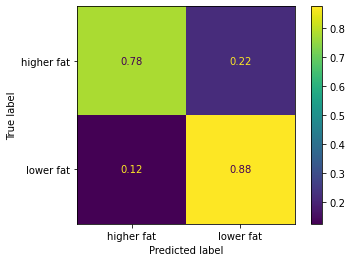

In [95]:
cm_plot = None
cm_plot = plot_confusion_matrix(random_search,X_test, y_test, normalize="true" )
cm_plot

In [96]:
print(classification_report(y_test, random_search.predict(X_test)))

              precision    recall  f1-score   support

  higher fat       0.77      0.78      0.78        73
   lower fat       0.88      0.88      0.88       136

    accuracy                           0.84       209
   macro avg       0.83      0.83      0.83       209
weighted avg       0.84      0.84      0.84       209



In [97]:
prediction=random_search.predict(X_test)
confusion_matrix(y_test,prediction )

array([[ 57,  16],
       [ 17, 119]])

In [98]:
prediction=random_search2.predict(X_test)
confusion_matrix(y_test,prediction )

array([[ 54,  19],
       [ 15, 121]])

### Discussion ###

There is a significant improvement from the baseline model to best model. When comparison of results Dummy classifier was used as a baseline model the testing accuracy was 67%. RandomForestClassifier was used as a best estimator with default parameters. As a result, 83% was the testing accuracy. After the hyperparameter tuning the training accuracy was increased to 84%. Also, training score of the best model had decreased after the hyperparameter tuning from 95% (estimator with default parameters) to 94%. However, decreasing the training value doesn't impact the training accuracy. Compared to the training score of the baseline model it was 65% and overall, it improved significantly. The unseen data tested with the best model and the testing score got 84% accuracy.

Next, major concern was the prediction of positive label which had 78% accuracy and the true negative labels have the 88% accuracy with the best model (hyperparameter tuning with 1 hyperparameter). When the unseen data (test data) predicted with model hyperparameter tuning with 2 hyperparameters, the accuracy of predicting positive label had gone down to 54%. 

Thus, confirming that the best model prediction is very correct with regards to the prediction of the positive label.
It could of improved the performance of the model if I would have considered the post processing features such as "FlavourEn" and "CharacteristicsEn" as well. Also, classes of the target feature are imbalanced and I used one strategy (changing the training procedure) to improve the prediction of positive labels. Again, if I would have used the second strategy "Changing the data", could have improved the predicting positive label.   




### References ###

1. Machine Learning Modules(UBC)
2.http://milkfacts.info/Nutrition%20Facts/Milk%20and%20Human%20Health.htm
3.https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
4.https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
5.https://od-do.agr.gc.ca/canadianCheeseDirectoryDictionaryEn.html

Date: 2021-08-14     

Auther: Pamodya Siriwardana                   